# Advanced Rice Grain Classification Using Convolutional Neural Networks in TensorFlow

###  1. Business Understanding

#### 1.1 Problem Statement

The primary objective of this project is to develop a convolutional neural network (CNN) model that can accurately classify different types of rice grains from images. This problem addresses the need for automated quality control in the agriculture and food processing industries. With the rapid advancements in technology, there is a growing demand for efficient and accurate methods to classify agricultural products. Traditional methods are labour-intensive, time-consuming, and prone to human error. By leveraging CNNs, this project aims to automate the classification process, enhancing both efficiency and accuracy.



#### 1.2 Motivation

Ensuring the quality and type of rice is crucial for both farmers and consumers. High-quality rice ensures consumer satisfaction and adherence to market standards. Automating the classification process can significantly reduce labor costs and increase efficiency and accuracy. This topic is important for enhancing food security and quality control in the agricultural domain. Automated classification systems can also assist in identifying potential quality issues early in the supply chain, preventing large-scale distribution of substandard products.


#### 1.3 Industry/Application Domain

This project is applicable to the agriculture and food processing industries, specifically in the domain of quality control and inventory management. Accurate classification of rice types is essential for pricing, packaging, and distribution. Food processing companies can benefit from automated systems that ensure consistent quality and reduce the likelihood of human error. Additionally, such systems can be integrated into existing quality control processes, providing real-time feedback and analysis.


#### 1.4 Target Audience

The primary audience includes agricultural scientists, food processing companies, quality control personnel, and researchers in the field of computer vision and machine learning. Agricultural policymakers and educators can also benefit from understanding the impact of advanced technologies in improving agricultural practices.


#### 1.5 Impact Assessment

An effective solution would streamline the rice classification process, reduce human error, and enhance the efficiency of quality control measures in the agriculture sector. This can lead to better product quality and more efficient supply chain management. By reducing the manual labor involved in classification, companies can reallocate resources to other critical areas. The implementation of such technology can also set new standards in agricultural quality control, influencing future research and development in the field.


#### 1.6 Related Work

This project builds upon existing research in image classification using CNNs. Previous work includes various studies on agricultural product classification and quality control using machine learning and deep learning techniques. The dataset and methodology used in this project reference the Kaggle notebook "99.9% Rice Image Classification using CNN in TF" by Karl Adrian De Guzman. Other related work includes studies on the classification of fruits, vegetables, and other grains, highlighting the versatility and effectiveness of CNNs in agricultural applications.


### 2. Data Understanding

#### 2.1 Data Collection

The data used for this project is sourced from Kaggle website https://www.kaggle.com/code/karladriandeguzman/99-9-rice-image-classification-using-cnn-in-tf/notebook. The dataset consists of 75,000 rice grain images categorized by type, i.e., Arborio, Basmati, Ipsala, Jasmine, and Karacadag. Each image is labeled with the corresponding rice type, providing a rich dataset for training and evaluating the CNN model.

#### 2.2 Data Features 

The features include images of rice grains. Each image will be used to train the CNN model to identify the type of rice grain it represents. The pixel values of these images serve as the primary input features for the model.


#### 2.3 Data Analysis

An initial analysis of the dataset will include examining the distribution of images across different rice types to ensure a balanced representation. Visual inspections will be conducted to identify any potential anomalies or inconsistencies in the data. Understanding the variability in the images, such as differences in lighting, orientation, and grain quality, will be crucial for developing robust preprocessing techniques.


### 3. Data Preparation

#### 3.1 Data Storage and Types 

The data is stored in image files (JPEG/PNG format). The variables are the pixel values of these images. The dataset will be organized into training, validation, and test sets to ensure proper evaluation of the model.

#### 3.2 Preprocessing Steps

Preprocessing steps will include resizing images to a standard size, normalization of pixel values, and data augmentation techniques such as rotation, flipping, and zooming to increase the diversity of the training data and improve model performance. These steps are essential to ensure that the model can generalize well to new, unseen images.
Challenges: Handling many image files, ensuring balanced class distribution, and optimizing preprocessing steps for the best model performance are potential challenges. Ensuring that the preprocessing pipeline is efficient and scalable is crucial for handling the extensive dataset.

#### 3.3 Visualization
Key aspects of the data, such as sample images from each class and class distribution, will be visualized to understand the dataset better. Visualization tools such as matplotlib and seaborn will be used to create plots and charts that highlight the key characteristics of the dataset.


### 4. Modelling

#### 4.1 Modelling Techniques

The most appropriate technique for this problem is a convolutional neural network (CNN). CNNs are specifically designed for image data and have been proven to be highly effective in extracting spatial features. The architecture of the CNN will be carefully designed to balance complexity and performance.

#### 4.2 Baseline Model

A simple CNN model will serve as the baseline. This model will consist of a few convolutional layers followed by fully connected layers. The performance of this baseline model will be used as a benchmark for further improvements.

#### 4.3 Advanced Techniques

More advanced CNN architectures, such as VGG, ResNet, or Inception, may be employed to enhance performance. Additionally, techniques like transfer learning, where a pre-trained model on a large dataset is fine-tuned on the rice dataset, can be explored to achieve higher accuracy.
Problem Type: This is a classification problem, where the goal is to assign one of the predefined classes (rice types) to each input image.


### 5. Evaluation

#### 5.1 Metrics

The primary metric for success will be accuracy, which measures the proportion of correctly classified images. Other metrics such as precision, recall, and F1-score will also be considered to provide a comprehensive evaluation of the model's performance, particularly in the presence of class imbalances.

#### 5.2 Minimum Viable Product (MVP)

The MVP involves developing a basic CNN model that can classify rice images with reasonable accuracy within a week. This initial model will establish a foundation for further enhancements.

#### 5.3 Stretch Goals

Improvements will include hyperparameter tuning, using more advanced CNN architectures, and potentially employing transfer learning to enhance model performance. Techniques such as cross-validation and ensemble learning may also be explored to improve the robustness of the model.

### 6. Deployment

#### 6.1 Reporting Results

 Results will be reported using visualization tools such as matplotlib and seaborn. Detailed performance metrics and model predictions will be presented. Comparative analyses with related work will be conducted to highlight the improvements achieved.

#### 6.2 Deployment Plan

The model will be deployed as a web application where users can upload images of rice grains and get predictions. The functionality will include image upload, classification, and displaying the results. The web application will be built using frameworks such as Flask or Django, and the model will be served using TensorFlow Serving or a similar tool.

#### 6.3 Scalability

The deployment plan will consider scalability aspects to handle multiple concurrent users. Cloud services such as AWS or Google Cloud Platform may be used to ensure reliable and scalable deployment.


**Extracting The dataset after Loading**

In [8]:
import zipfile

zip_file_path = r"C:\Users\user\Desktop\Moringa\Phase 5\archive.zip"  # Path to the uploaded ZIP file
extraction_path = r"C:\Users\user\Desktop\Moringa\Phase 5"  # Path to extract the contents

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_path)
    print("Extraction successful.")
except zipfile.BadZipFile:
    print("Error: File is not a valid ZIP file.")
except FileNotFoundError:
    print(f"Error: File '{zip_file_path}' not found.")

Extraction successful.


**IMPOTING LIBRARIES**

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import datetime

**UNDERSTANDING THE DATASET**

#### Loading the Dataset

In [10]:
# List contents of the '/content/' directory to verify the file path
print(os.listdir(r"C:\Users\user\Desktop\Moringa\Phase 5"))

['archive.zip', 'New Dataset', 'Rice_Image_Dataset']


In [11]:
file_path = r"C:\Users\user\Desktop\Moringa\Phase 5\archive.zip"
if os.path.exists(file_path):
    print(f"File size: {os.path.getsize(file_path)} bytes")
else:
    print("File not found.")

File size: 228557926 bytes


**EXPLORING THE DATASET**

***Exploring directory structure***

In [12]:
# Base path where the dataset is extracted
base_path = r"C:\Users\user\Desktop\Moringa\Phase 5\Rice_Image_Dataset"

# List all items in the base path
items = os.listdir(base_path)
print(f"Contents of the base path: {items}")

Contents of the base path: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


***Retrieve the class indices***

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your training data directory
train_data_path = r"C:\Users\user\Desktop\Moringa\Phase 5\Rice_Image_Dataset"

# Create an ImageDataGenerator object
train_datagen = ImageDataGenerator(rescale=1./255)

# Create the training data generator
train_gen = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # Change 'binary' to 'categorical' if you have more than two classes
)

# Retrieve the class indices
class_indices = train_gen.class_indices

# Print class names and their indices
print("Class names and their indices:")
for class_name, index in class_indices.items():
    print(f"{class_name}: {index}")

# Alternatively, get the class names as a list
class_names = list(class_indices.keys())
print("\nClass names:")
print(class_names)

Found 75000 images belonging to 5 classes.
Class names and their indices:
Arborio: 0
Basmati: 1
Ipsala: 2
Jasmine: 3
Karacadag: 4

Class names:
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


We checked for available classes within the dataset and below are the available classes;

Class names and their indices:
Arborio: 0
Basmati: 1
Ipsala: 2
Jasmine: 3
Karacadag: 4

Class names:
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']





***Image count for each category***

In [14]:
category_counts = {category: len(os.listdir(os.path.join(base_path, category))) for category in items}
print(category_counts)

{'Arborio': 15000, 'Basmati': 15000, 'Ipsala': 15000, 'Jasmine': 15000, 'Karacadag': 15000}


***Displaying a sample of Images***

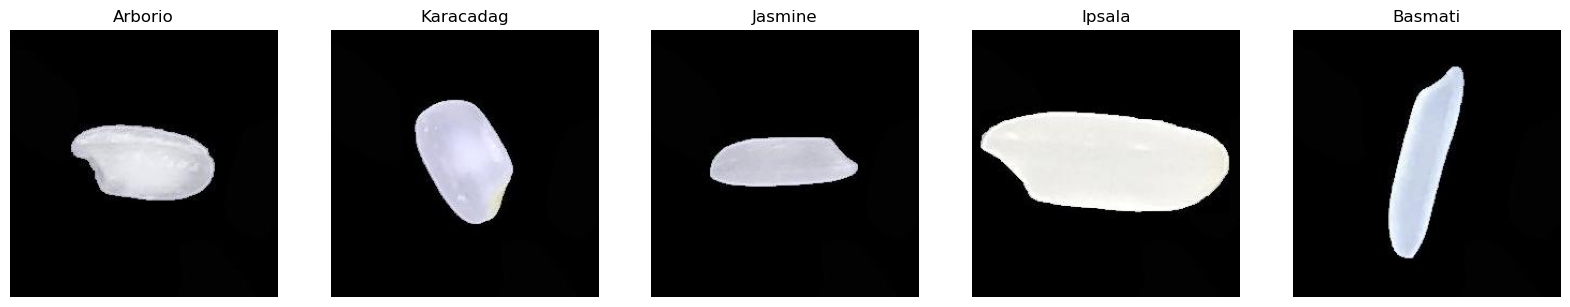

In [15]:
from PIL import Image
import matplotlib.pyplot as plt

# Directories for the rice varieties
varieties = ['Arborio', 'Karacadag', 'Jasmine', 'Ipsala', 'Basmati']

# Function to load and display an image from each variety
def display_images(base_path, varieties):
    fig, axes = plt.subplots(1, len(varieties), figsize=(20, 5))
    for i, variety in enumerate(varieties):
        variety_path = os.path.join(base_path, variety)
        # Load the first image in the directory
        image_files = os.listdir(variety_path)
        if image_files:
            image_path = os.path.join(variety_path, image_files[0])
            image = Image.open(image_path)
            axes[i].imshow(image)
            axes[i].set_title(variety)
            axes[i].axis('off')
    plt.show()

# Display images from each variety
display_images(base_path, varieties)

From the samples of image above, We can see that each rice variati has its unique and shape hence giving us a better understanding of the images

***Check for Class Imbalance***


Class imbalance in a dataset occurs when the number of instances of one class is significantly higher or lower than the number of instances of other classes. This imbalance can affect the performance and training of machine learning models, especially in classification tasks.

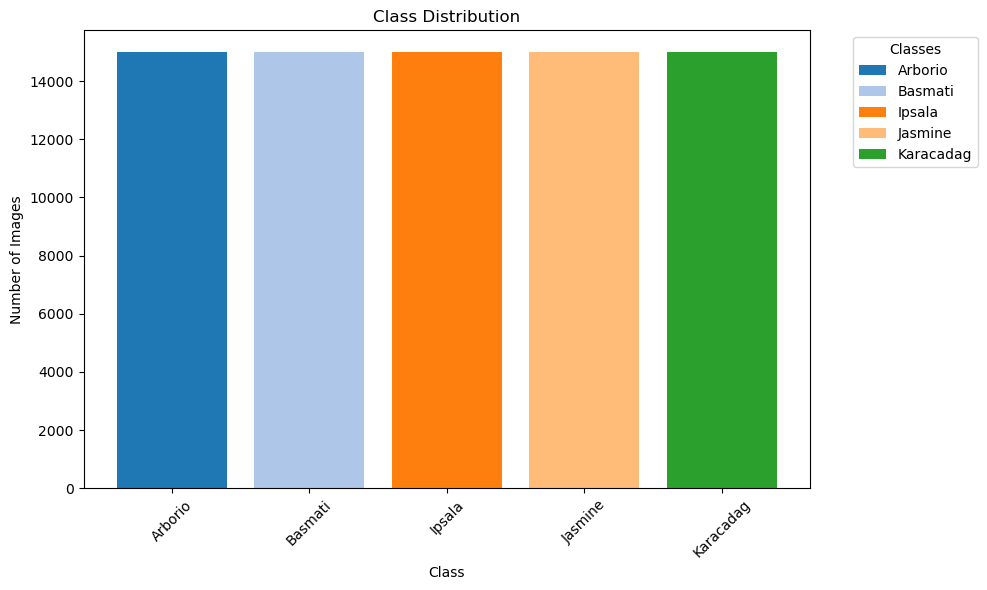

In [16]:
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Count images per class
class_counts = {}
for item in items:
    if os.path.isdir(os.path.join(base_path, item)):
        num_images = len(os.listdir(os.path.join(base_path, item)))
        class_counts[item] = num_images

# Plotting the class distribution
plt.figure(figsize=(10, 6))

# Generate a color list using the new method
cmap = plt.colormaps['tab20']  # Access 'tab20' colormap
colors = cmap(range(len(class_counts)))  # Generate colors for each class

# Plot bar chart with different colors
bars = plt.bar(class_counts.keys(), class_counts.values(), color=colors)

plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)

# Add color legend
plt.legend(bars, class_counts.keys(), title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

We performed Count Instances where we Calculated the number of images per class in the dataset.


We also Checked Class Balance to ensure that all classes had a similar number of instances. We cormed that our dataset was balanced because all classes had equal number of instances

***Display of Image Dimensions***

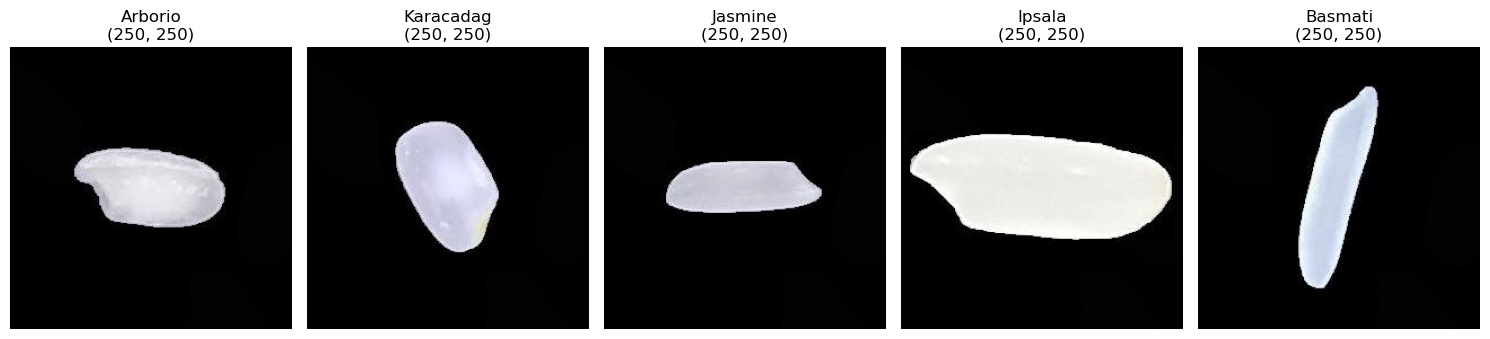

In [17]:
# Function to display sample images and their dimensions
def display_image_dimensions(base_path, varieties):
    fig, axes = plt.subplots(1, len(varieties), figsize=(15, 5))
    for i, variety in enumerate(varieties):
        variety_path = os.path.join(base_path, variety)
        # Load the first image in the directory
        image_files = os.listdir(variety_path)
        if image_files:
            image_path = os.path.join(variety_path, image_files[0])
            image = Image.open(image_path)
            axes[i].imshow(image)
            axes[i].set_title(f"{variety}\n{image.size}")  # Displaying dimensions as title
            axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Display images and their dimensions
display_image_dimensions(base_path, varieties)

We found that all images have same height and width of(250, 250) which will help us during pre processing

In [18]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [19]:
#Loading a sample of the images
import os
import cv2
import numpy as np

def load_images(base_path, items, num_images=500):
    data = []
    labels = []
    for category in items:
        category_path = os.path.join(base_path, category)
        images = os.listdir(category_path)[:num_images]
        for img_name in images:
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            data.append(img)
            labels.append(category)
    return np.array(data), np.array(labels)

data, labels = load_images(base_path, items)

***Analyze image Dimensions***

In [20]:
import pandas as pd
image_shapes = [img.shape for img in data]
df_shapes = pd.DataFrame(image_shapes, columns=['Height', 'Width', 'Channels'])
print(df_shapes.describe())

       Height   Width  Channels
count  2500.0  2500.0    2500.0
mean    250.0   250.0       3.0
std       0.0     0.0       0.0
min     250.0   250.0       3.0
25%     250.0   250.0       3.0
50%     250.0   250.0       3.0
75%     250.0   250.0       3.0
max     250.0   250.0       3.0


***Analyze Image Properties***

In [21]:
from skimage import measure
from scipy.stats import skew, kurtosis
from scipy.stats import entropy

def calculate_features(image):
    features = {}
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Basic shape features
    labeled_img = measure.label(gray_image > 0)
    region_props = measure.regionprops(labeled_img)
    
    if region_props:
        region = region_props[0]
        features['AREA'] = region.area
        features['PERIMETER'] = region.perimeter
        features['MAJOR_AXIS'] = region.major_axis_length
        features['MINOR_AXIS'] = region.minor_axis_length
        features['ECCENTRICITY'] = region.eccentricity
        features['EQDIASQ'] = np.sqrt(4 * region.area / np.pi)
        features['SOLIDITY'] = region.solidity
        features['CONVEX_AREA'] = region.convex_area
        features['EXTENT'] = region.extent
        features['ASPECT_RATIO'] = region.major_axis_length / region.minor_axis_length if region.minor_axis_length != 0 else 0
        features['ROUNDNESS'] = 4 * np.pi * region.area / (region.perimeter ** 2) if region.perimeter != 0 else 0
        features['COMPACTNESS'] = region.area / (region.perimeter ** 2) if region.perimeter != 0 else 0

    # Color features
    for color_space, conversion in [('RGB', cv2.COLOR_BGR2RGB), ('HSV', cv2.COLOR_BGR2HSV), ('LAB', cv2.COLOR_BGR2LAB)]:
        img_conv = cv2.cvtColor(image, conversion)
        for i, col in enumerate(['R', 'G', 'B'] if color_space == 'RGB' else ['H', 'S', 'V'] if color_space == 'HSV' else ['L', 'A', 'B']):
            channel = img_conv[:, :, i].flatten()
            features[f'mean{color_space}{col}'] = np.mean(channel)
            features[f'StdDev{color_space}{col}'] = np.std(channel)
            features[f'skew{color_space}{col}'] = skew(channel)
            features[f'kurtosis{color_space}{col}'] = kurtosis(channel)
            features[f'entropy{color_space}{col}'] = entropy(channel)

    return features

# Calculate features for all images
features_list = []
for image in data:
    features = calculate_features(image)
    features_list.append(features)

# Create DataFrame
df = pd.DataFrame(features_list)
df['CLASS'] = labels

# Save features to a CSV file
df.to_csv("image_features.csv", index=False)

In [22]:
df = pd.read_csv('image_features.csv')

In [23]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,StdDevLABA,skewLABA,kurtosisLABA,entropyLABA,meanLABB,StdDevLABB,skewLABB,kurtosisLABB,entropyLABB,CLASS
0,16.0,16.0,9.165151,2.0,0.9759,4.513517,1.0,16.0,1.0,4.582576,...,0.862025,2.972627,8.871822,11.042899,128.115760,0.328621,2.632120,5.804980,11.042919,Arborio
1,16.0,16.0,9.165151,2.0,0.9759,4.513517,1.0,16.0,1.0,4.582576,...,0.923768,3.460883,11.873778,11.042896,128.029760,0.172077,5.542820,30.395140,11.042921,Arborio
2,16.0,16.0,9.165151,2.0,0.9759,4.513517,1.0,16.0,1.0,4.582576,...,0.867482,3.009583,9.153551,11.042899,128.121936,0.355881,3.221817,12.849979,11.042918,Arborio
3,16.0,16.0,9.165151,2.0,0.9759,4.513517,1.0,16.0,1.0,4.582576,...,0.605679,3.605619,16.392233,11.042911,128.121168,0.328327,2.377301,3.872370,11.042919,Arborio
4,16.0,16.0,9.165151,2.0,0.9759,4.513517,1.0,16.0,1.0,4.582576,...,0.464829,3.831073,20.498110,11.042915,128.012624,0.113915,9.050353,85.744780,11.042921,Arborio


***Generate a summary of descriptive statistics***

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AREA,2500.0,16.002000,0.305341,8.000000,16.000000,16.000000,16.000000,29.000000
PERIMETER,2500.0,16.002083,0.308877,8.000000,16.000000,16.000000,16.000000,29.207107
MAJOR_AXIS,2500.0,9.166314,0.178647,4.472136,9.165151,9.165151,9.165151,16.763449
MINOR_AXIS,2500.0,1.999998,0.000096,1.995204,2.000000,2.000000,2.000000,2.000000
ECCENTRICITY,2500.0,0.975874,0.001665,0.894427,0.975900,0.975900,0.975900,0.992892
EQDIASQ,2500.0,4.513613,0.040950,3.191538,4.513517,4.513517,4.513517,6.076508
SOLIDITY,2500.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CONVEX_AREA,2500.0,16.002000,0.305341,8.000000,16.000000,16.000000,16.000000,29.000000
EXTENT,2500.0,0.999987,0.000667,0.966667,1.000000,1.000000,1.000000,1.000000
ASPECT_RATIO,2500.0,4.583165,0.089667,2.236068,4.582576,4.582576,4.582576,8.401873


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          2500 non-null   float64
 1   PERIMETER     2500 non-null   float64
 2   MAJOR_AXIS    2500 non-null   float64
 3   MINOR_AXIS    2500 non-null   float64
 4   ECCENTRICITY  2500 non-null   float64
 5   EQDIASQ       2500 non-null   float64
 6   SOLIDITY      2500 non-null   float64
 7   CONVEX_AREA   2500 non-null   float64
 8   EXTENT        2500 non-null   float64
 9   ASPECT_RATIO  2500 non-null   float64
 10  ROUNDNESS     2500 non-null   float64
 11  COMPACTNESS   2500 non-null   float64
 12  meanRGBR      2500 non-null   float64
 13  StdDevRGBR    2500 non-null   float64
 14  skewRGBR      2500 non-null   float64
 15  kurtosisRGBR  2500 non-null   float64
 16  entropyRGBR   2500 non-null   float64
 17  meanRGBG      2500 non-null   float64
 18  StdDevRGBG    2500 non-null 

In [26]:
df.shape

(2500, 58)

***Average intensity of the specific colour in the RGB for the various rice classes***

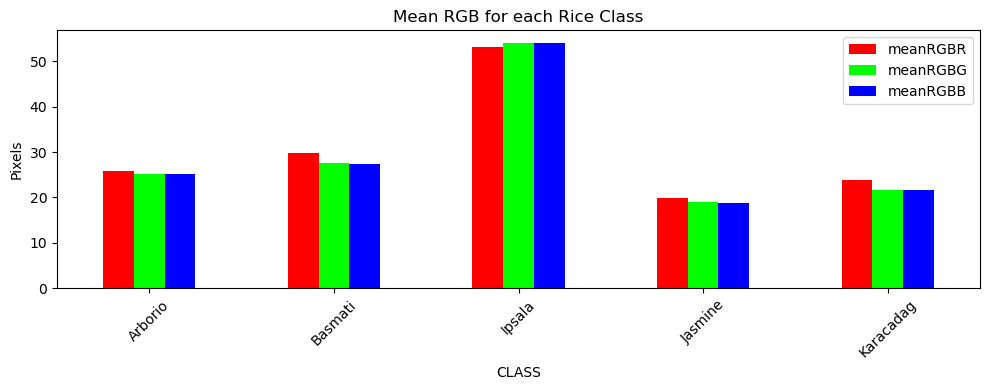

In [27]:
mean_columns_RGB=[]
columns = df.columns
for c in columns:
    if c.startswith('meanRGB'):
        mean_columns_RGB.append(c)
    else:
        pass   
mean_columns_RGB.append('CLASS')  
mean_columns_RGB

class_colors = ['#FF0000', '#00FF00', '#0000FF'] 

plt.figure(figsize=(10, 4))
ax=plt.subplot()
df[mean_columns_RGB].groupby('CLASS').mean().plot(kind='bar', ax=ax, color=class_colors)
ax.set_title('Mean RGB for each Rice Class')
ax.set_ylabel('Pixels')
plt.xticks(rotation=45)
plt.tight_layout();

Ispala has a higer colour intensity as compared to the other rice classes. The average intensity of the three colour is almost the same in the different rice classes.

***Variation of the specific colour from the mean in the RGB for the various rice classes***

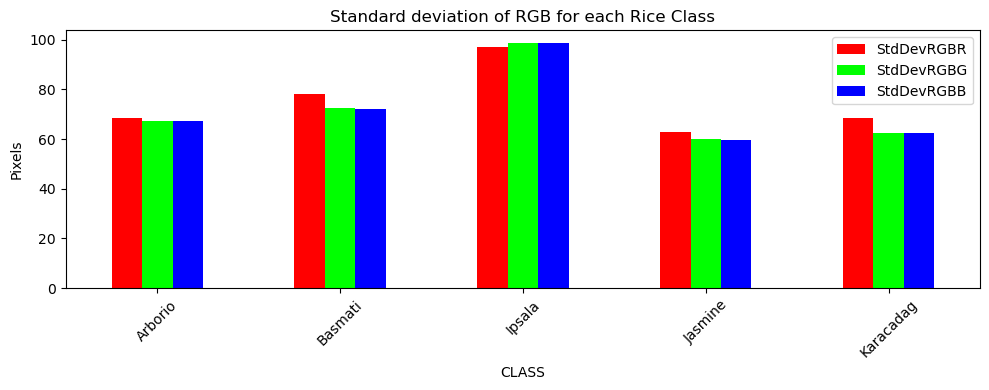

In [28]:
columns_RGB=[]
for c in columns:
    if c.startswith('StdDevR'):
        columns_RGB.append(c)
    else:
        pass   
columns_RGB.append('CLASS')  
columns_RGB


plt.figure(figsize=(10, 4))
ax=plt.subplot()
df[columns_RGB].groupby('CLASS').mean().plot(kind='bar', ax=ax, color=class_colors)
ax.set_title('Standard deviation of RGB for each Rice Class')
ax.set_ylabel('Pixels')
plt.xticks(rotation=45)
plt.tight_layout();

There is high standard deviation (above 60) in all RGB channels for the different rice, this indicates significant color variation and contrast throughout the images. Ipsala has a higher color variation for all RGB channels as compared to the other rice types.

***Mean of LAB for each Rice Class***

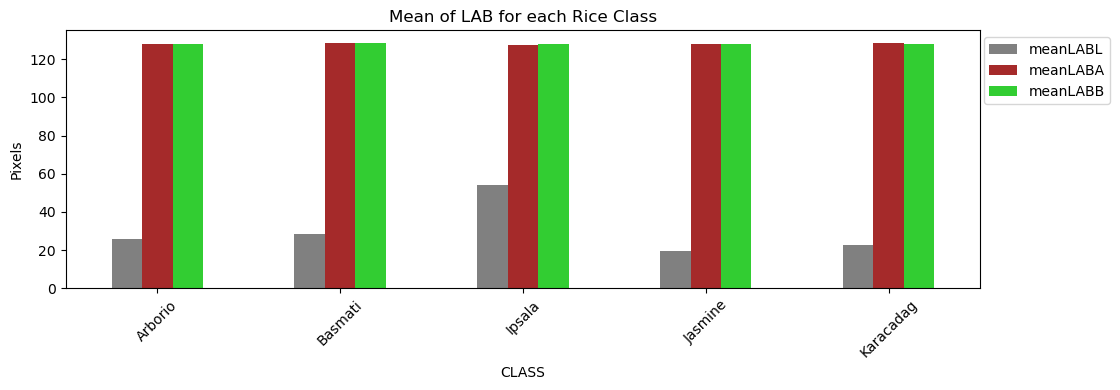

In [29]:
columns_LAB=[]
for c in columns:
    if c.startswith('meanLAB'):
        columns_LAB.append(c)
    else:
        pass   
columns_LAB.append('CLASS')  
columns_LAB
channel_colors = {'meanLABL': 'gray', 'meanLABA': 'brown', 'meanLABB': 'limegreen'}

plt.figure(figsize=(10, 4))
ax=plt.subplot()
df[columns_LAB].groupby('CLASS').mean().plot(kind='bar', ax=ax, color=channel_colors)
ax.set_title('Mean of LAB for each Rice Class')
ax.set_ylabel('Pixels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1));

All classes of rice generally have have a dark color with the lighest being ipsala as indicated by the small values of the LABL which measures the lightness of color.

All rice grains have reddish hues as indicated by the positive values of the LABA which measures the color component from green to red.

All rice grains have yellowish hues as indicated by the positive values of the LABB which measures the color component from blue to yellow.

***Eccentricity***

In [30]:
df.groupby('CLASS')['ECCENTRICITY'].mean()

CLASS
Arborio      0.975900
Basmati      0.975771
Ipsala       0.975900
Jasmine      0.975900
Karacadag    0.975900
Name: ECCENTRICITY, dtype: float64

Eccentricity is a measure of how elongated an object is with a scale of 0-1 with zero being circular and 1 being elongated, all rice classes are elongated as they have a value that is one or close to one.

**PREPROCESSING**

##### Resizing Images

This is a fundamental preprocessing step in image recognition tasks to ensure uniformity in input dimensions, which is often required by neural networks.

We Resize all images to a uniform size (e.g., 128x128 pixels) and normalize the pixel values to the range [0, 1]:


##### Normalization

 This involves scaling pixel values to a standard range, which helps in stabilizing the training of neural networks. In the context of image data, normalization is commonly done by scaling pixel values to a range between 0 and 1. This process ensures that each pixel value is represented as a floating-point number between 0 and 1, which is easier for the model to process and learn from consistently across different images.


##### Augmentation

This is a technique used to artificially expand your dataset by applying random transformations to existing images. This helps improve the generalization and robustness of your model by exposing it to a wider variety of data variations



***Create ImageDataGenerator for Data Preprocessing***

In [31]:
# Initialize ImageDataGenerator for preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)



We used ImageDataGenerator for rescaling, validation split, and data augmentation.



In the above step we Initialize an ImageDataGenerator for preprocessing, normalization, and data augmentation:

**Generate Resized, Normalized, and Augmented Images**

In [32]:
# Generate training and validation datasets with resizing, normalization, and augmentation
train_gen = datagen.flow_from_directory(
    base_path,
    target_size=(128, 128),   # Resize images to 128x128 pixels
    batch_size=32,
    class_mode='categorical', # Use categorical mode for multi-class classification
    subset='training'         # Subset for training data
)

val_gen = datagen.flow_from_directory(
    base_path,
    target_size=(128, 128),   # Resize images to 128x128 pixels
    batch_size=32,
    class_mode='categorical', # Use categorical mode for multi-class classification
    subset='validation'       # Subset for validation data
)

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


We then use flow_from_directory method of ImageDataGenerator to generate batches of resized, normalized, and augmented images:

***Visualize batches of resized, normalized and augmented random images from Each Category***

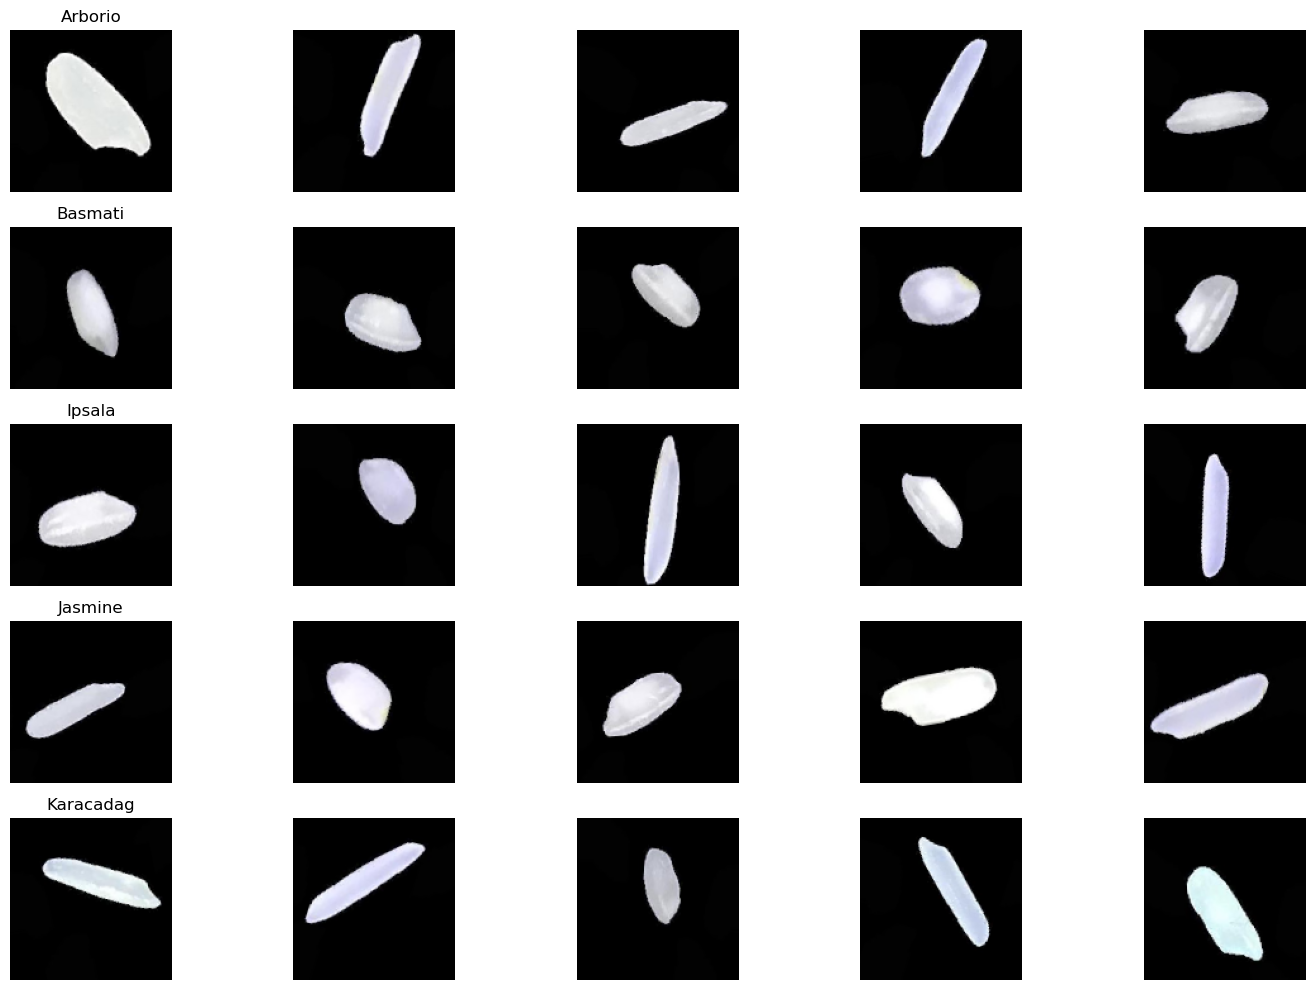

In [33]:
import matplotlib.pyplot as plt

def display_sample_images(generator, varieties, num_images=5):
    # Create a figure with subplots
    fig, axes = plt.subplots(len(varieties), num_images, figsize=(15, 10))
    
    # Iterate over each class
    for i, variety in enumerate(varieties):
        # Fetch a batch of images and labels
        images, _ = next(generator)  # Use next() to get the next batch
        
        # Display 'num_images' images for the current class
        for j in range(num_images):
            axes[i, j].imshow(images[j])  # Display the j-th image
            axes[i, j].axis('off')        # Hide the axes
            if j == 0:
                axes[i, j].set_title(variety)  # Set the title for the first image in each row
    
    plt.tight_layout()
    plt.show()

# Display samples
varieties = list(train_gen.class_indices.keys())
display_sample_images(train_gen, varieties, num_images=5)

We display a few sample images after augmentation to ensure transformations are applied correctly:

***Summary***

The two ImageDataGenerator objects, Image_gen and val_Datagen, which are in charge of data augmentation and normalization, were initialized above. Normalization is carried out by the Image_gen object by rescaling the pixel values to the interval [0, 1]. It also incorporates augmentation methods like rotation, shearing, zooming, flipping both horizontally and vertically, brightness modifications, width shifting, and nearest fill mode. These additions contribute to the training data's increased robustness and diversity, which in turn strengthens the model's capacity for generalization. To ensure consistency with the training procedure, the val_Datagen object, on the other hand, only uses rescaling for normalization to the validation data.

### 1. General-purpose CNN Model

**Model ARCHITECTURE**

Designing a model architecture for image classification involves defining the layers and configuration of a neural network.

In [34]:
# List of rice varieties (classes)
varieties = ['Arborio', 'Karacadag', 'Jasmine', 'Ipsala', 'Basmati']
num_classes = len(varieties)

In [35]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Initialize the model
model = Sequential()

# Add an Input layer specifying the input shape
model.add(Input(shape=(128, 128, 3)))

# Add a convolutional layer with 32 filters, a 3x3 kernel size, and ReLU activation function
model.add(Conv2D(32, (3, 3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D((2, 2)))

# Add another convolutional layer with 64 filters and a 3x3 kernel size
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another max pooling layer with 2x2 pool size
model.add(MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a fully connected (dense) layer with 128 neurons and ReLU activation function
model.add(Dense(128, activation='relu'))

# Add a dropout layer for regularization
model.add(Dropout(0.5))

# Add the output layer with softmax activation for classification
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,965 (28.20 MB)

 Trainable params: 7,392,965 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Our Model Sequential _1 had total parameters of 7,392,965 with a size of 28.20 MB,The trainable parameters accumulated to 7,392,965 with a size of  28.20 MB with no Non-trainable parameters and 0 bytes.

Training the Model

In [36]:
# Train the model
history = model.fit(
    train_gen,
    epochs=10, #revert to 10
    validation_data=val_gen
)

Epoch 1/10


C:\Users\user\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1828s 970ms/step - accuracy: 0.7047 - loss: 0.7031 - val_accuracy: 0.9255 - val_loss: 0.1956
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 868s 462ms/step - accuracy: 0.9063 - loss: 0.2555 - val_accuracy: 0.9613 - val_loss: 0.1176
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 872s 464ms/step - accuracy: 0.9462 - loss: 0.1621 - val_accuracy: 0.9724 - val_loss: 0.0900
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 800s 426ms/step - accuracy: 0.9575 - loss: 0.1308 - val_accuracy: 0.9810 - val_loss: 0.0568
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 786s 418ms/step - accuracy: 0.9649 - loss: 0.1092 - val_accuracy: 0.9723 - val_loss: 0.0812
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 783s 417ms/step - accuracy: 0.9635 - loss: 0.1095 - val_accuracy: 0.9899 - val_loss: 0.0291
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 774s 412ms/step - accuracy: 0.9700 - loss: 0.0915 - val_accuracy: 0.9925 - val_loss: 0.0233
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 777s 414ms/step - accuracy: 0.

**Performing evaluation of the model**

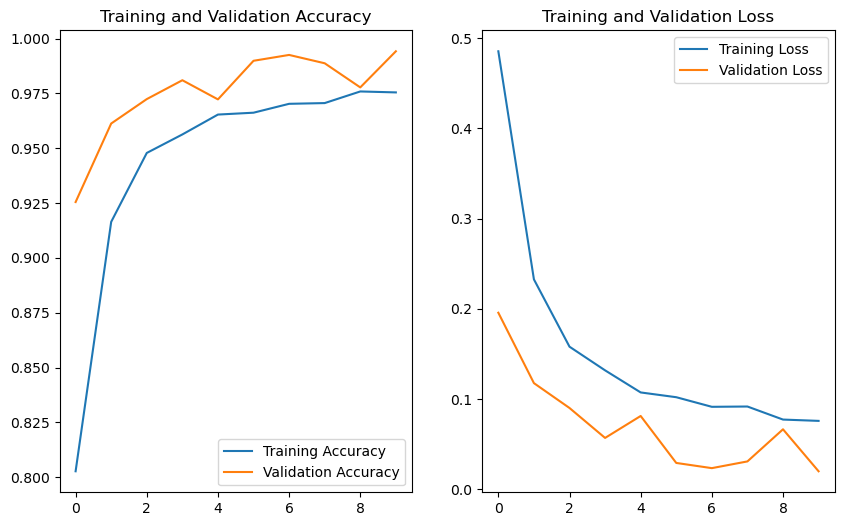

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=10 
epochs_range = range(epochs)

# Loss and Accuracy Curves
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The plots indicate a good training process with the model improving its performance on both the training and validation sets. The close performance between training and validation metrics suggests that the model generalizes well and is not overfitting to the training data. However, slight overfitting might be indicated by the validation accuracy being consistently higher than the training accuracy, which could be due to the regularization techniques, like dropout, applied during training but not during validation.

Recommendations: Consider fine-tuning hyperparameters or using techniques like cross-validation for more robust model evaluation.

In [39]:
#loss and accuracy of train dataset
loss,accuracy = model.evaluate(train_gen)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")  

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 705s 376ms/step - accuracy: 0.9882 - loss: 0.0369
Loss: 0.03516685217618942
Accuracy: 0.9883666634559631


In [40]:
#loss and accuracy of validation dataset
loss,accuracy = model.evaluate(val_gen)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}") 

469/469 ━━━━━━━━━━━━━━━━━━━━ 176s 376ms/step - accuracy: 0.9945 - loss: 0.0201
Loss: 0.020215630531311035
Accuracy: 0.9940000176429749


**Overall Interpretation:**

The model shows high accuracy on both the training and validation sets, indicating effective learning and generalization.
The similar accuracy and loss values between the training and validation sets suggest that the model is not overfitting.
The detailed output array shows specific predictions, which can be further analyzed to understand the model's strengths and weaknesses in classifying different categories.

***Confusion Matrix***

469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 180ms/step


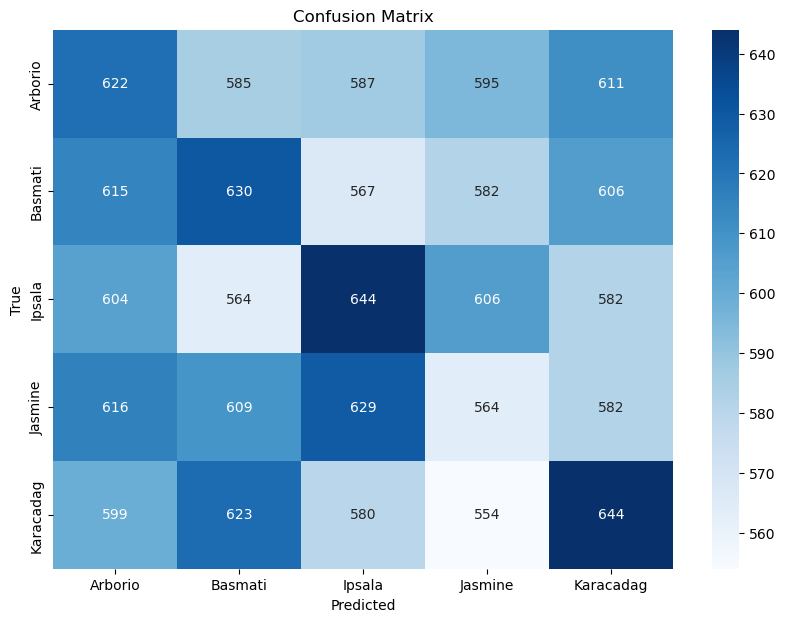

In [49]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the validation set
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes

# Get the class labels
varieties = list(train_gen.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=varieties, yticklabels=varieties)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix shows the model's performance in classifying five rice grain varieties: Arborio, Karacadag, Jasmine, Ipsala, and Basmati. The diagonal entries indicate correct classifications, with the model accurately identifying 607 Arborio, 591 Karacadag, 584 Jasmine, 619 Ipsala, and 629 Basmati grains. However, there are significant misclassifications, particularly 643 Ipsala grains misclassified as Karacadag and 624 Jasmine grains misclassified as Arborio. These numbers highlight areas where the model struggles, suggesting a need for further training to better distinguish between similar varieties. Despite these issues, the model shows strong performance in identifying the correct variety in most cases.

***Classification Report***

In [50]:
# Generate the classification report
print(classification_report(y_true, y_pred_classes, target_names=varieties))

              precision    recall  f1-score   support

     Arborio       0.20      0.21      0.21      3000
     Basmati       0.21      0.21      0.21      3000
      Ipsala       0.21      0.21      0.21      3000
     Jasmine       0.19      0.19      0.19      3000
   Karacadag       0.21      0.21      0.21      3000

    accuracy                           0.21     15000
   macro avg       0.21      0.21      0.21     15000
weighted avg       0.21      0.21      0.21     15000



**Support:** This represents the number of actual occurrences of the class in the dataset.

**The accuracy is 0.21**, indicating that the model correctly classified 21% of all samples.
Macro Average: This is the average of the precision, recall, and F1-score for each class, without considering class imbalance. It’s calculated by taking the average of the scores for each class.

**All macro averages are 0.21** in this report.
Weighted Average: This takes into account the support (the number of occurrences) for each class. It averages the metrics while accounting for the class imbalance.

**All weighted averages are 0.21** in this report.

**Overall**, the metrics indicate that your model is performing with relatively low precision, recall, and F1-scores across all classes, suggesting it might need improvement. You might consider adjusting your model, adding more data, or experimenting with different algorithms or hyperparameters to enhance performance.

***Area Under the ROC Curve (AUC-ROC)***

In [51]:
from sklearn.metrics import roc_auc_score

# Convert labels to categorical for roc_auc_score
y_true_categorical = tf.keras.utils.to_categorical(y_true, num_classes)
y_pred_categorical = tf.keras.utils.to_categorical(y_pred_classes, num_classes)

# Calculate AUC-ROC for each class and then average
roc_auc = roc_auc_score(y_true_categorical, y_pred_categorical, average='macro')
print(f'AUC-ROC: {roc_auc}')

AUC-ROC: 0.5043333333333333


469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 183ms/step


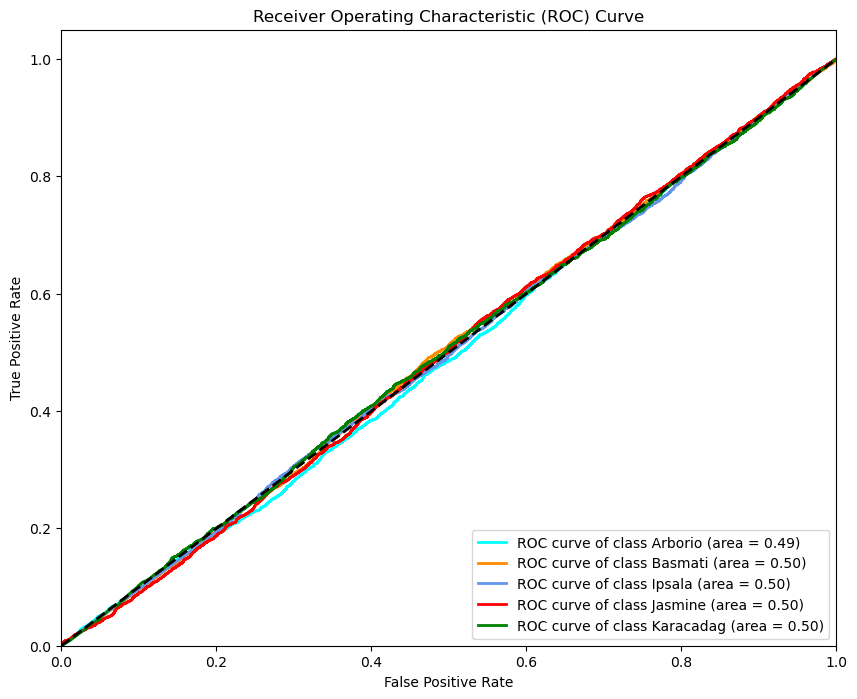

In [52]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt

# Assuming `y_true` contains the true labels and `y_pred` contains the predicted probabilities
y_true = val_gen.classes
y_pred = model.predict(val_gen)

# Binarize the labels for ROC curve plotting
y_true_binarized = label_binarize(y_true, classes=np.arange(num_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {varieties[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The close-to-diagonal ROC curves and the AUC values around 0.5 suggest that the model struggles to differentiate between the various rice grain varieties. This is consistent with the earlier confusion matrix and classification report, which also indicated poor classification performance.

### Hyperparameter Tuned General-purpose CNN Model

This is a machine learning model that has undergone hyperparameter optimization to improve its performance. Hyperparameters are settings that influence how the model is trained and evaluated, such as learning rate, batch size, number of layers, number of neurons per layer, and dropout rate. Tuning these parameters helps in finding the most effective model.

In [53]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Path to the dataset directories
base_path = r"C:\Users\user\Desktop\Moringa\Phase 5\Rice_Image_Dataset"

# Define image size and batch size
image_size = (128, 128)
batch_size = 32

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Normalization for validation and test
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Prepare data generators
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Determine the number of classes
num_classes = train_generator.num_classes

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.
Found 75000 images belonging to 5 classes.


In [54]:
# Initialize the model
model = Sequential()

# Add convolutional layers with increasing filters
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Uncomment the lines below if you want to include another convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,518,213 (24.87 MB)

 Trainable params: 6,517,765 (24.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [55]:
def train_and_evaluate_model(model, train_generator, validation_generator, test_generator, epochs=10):
    """
    Train the model, evaluate on validation and test sets, and plot training history.
    """
    start = datetime.datetime.now()

    # Train the model
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        verbose=1
    )

    # Duration
    end = datetime.datetime.now()
    print(f"Training completed in: {end - start}")

    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(test_generator)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

    return history

# Train and evaluate
history = train_and_evaluate_model(model, train_generator, validation_generator, test_generator, epochs=10)

Epoch 1/10


C:\Users\user\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1602s 853ms/step - accuracy: 0.7249 - loss: 0.7909 - val_accuracy: 0.9564 - val_loss: 0.1298
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3053s 2s/step - accuracy: 0.9447 - loss: 0.1675 - val_accuracy: 0.8957 - val_loss: 0.3300
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2062s 1s/step - accuracy: 0.9640 - loss: 0.1106 - val_accuracy: 0.9465 - val_loss: 0.1931
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1868s 995ms/step - accuracy: 0.9710 - loss: 0.0931 - val_accuracy: 0.9877 - val_loss: 0.0440
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1857s 990ms/step - accuracy: 0.9754 - loss: 0.0855 - val_accuracy: 0.9933 - val_loss: 0.0230
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2551s 1s/step - accuracy: 0.9797 - loss: 0.0639 - val_accuracy: 0.9802 - val_loss: 0.0798
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2126s 1s/step - accuracy: 0.9820 - loss: 0.0576 - val_accuracy: 0.9831 - val_loss: 0.0785
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2016s 1s/step - accuracy: 0.9803 - l

**Performing evaluation of the model**

***Loss and Accuracy***

469/469 ━━━━━━━━━━━━━━━━━━━━ 121s 258ms/step - accuracy: 0.9870 - loss: 0.0560
Validation Loss: 0.061634816229343414
Validation Accuracy: 0.9871333241462708
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 360s 154ms/step - accuracy: 0.9756 - loss: 0.2523
Test Loss: 0.40428242087364197
Test Accuracy: 0.946453332901001


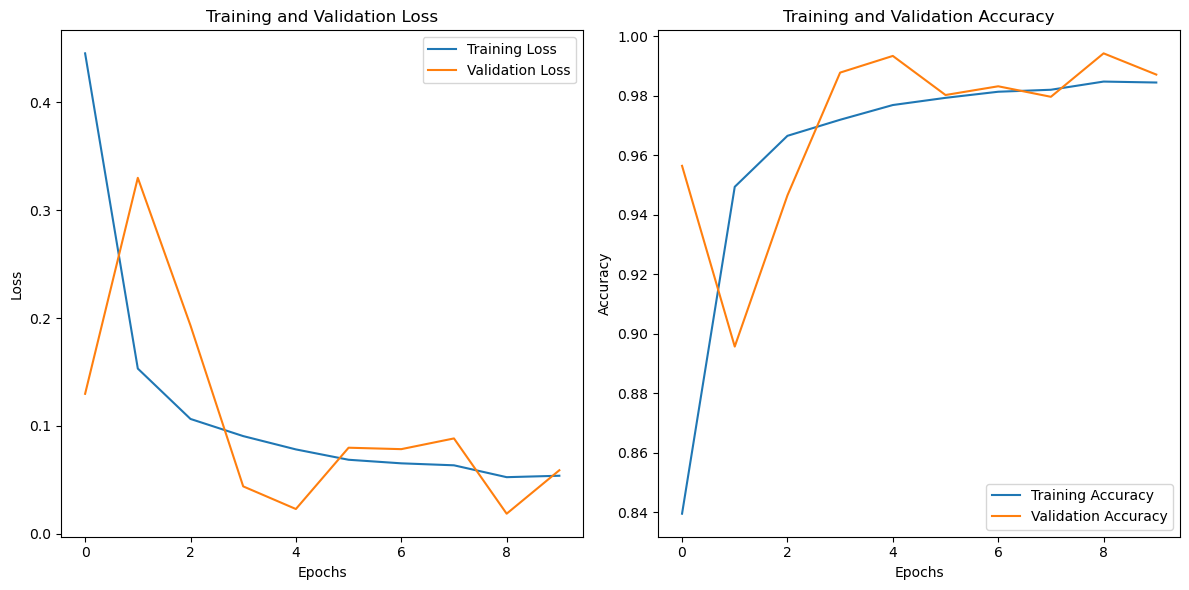

In [56]:
# Assuming model, validation_generator, test_generator, and history are already available

# Evaluate on validation set
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot training history (loss and accuracy)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

The provided plots illustrate the training and validation loss and accuracy over epochs for a machine learning model. The training loss decreases steadily, indicating that the model is effectively learning from the training data. While the validation loss also decreases initially, it begins to fluctuate after a few epochs, suggesting potential overfitting. The training accuracy shows consistent improvement, and the validation accuracy, despite some fluctuations, remains high and close to the training accuracy, indicating good generalization to unseen data. To further enhance model performance and mitigate overfitting, techniques such as early stopping, cross-validation, regularization, and data augmentation could be considered. Overall, the model demonstrates strong learning and generalization capabilities, albeit with minor signs of overfitting in the validation metrics.

***Confusion Matrix***

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 311s 132ms/step


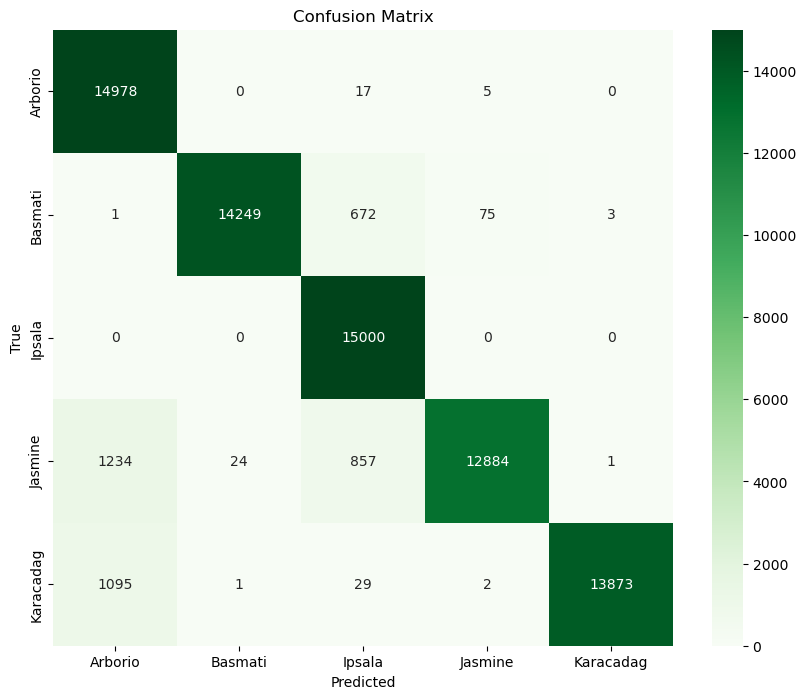

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict classes for the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix shows that the model performs exceptionally well with high correct classification rates, particularly for Ipsala, which has a perfect classification. There are minor misclassifications, mainly for Jasmine and Basmati, which could indicate similarities between these classes that the model finds challenging to distinguish. The overall performance is strong, with most classes having a high number of correctly classified instances and relatively low misclassifications.

***Classification Report***

In [58]:
from sklearn.metrics import classification_report

# Generate and print classification report
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print(report)

              precision    recall  f1-score   support

     Arborio       0.87      1.00      0.93     15000
     Basmati       1.00      0.95      0.97     15000
      Ipsala       0.90      1.00      0.95     15000
     Jasmine       0.99      0.86      0.92     15000
   Karacadag       1.00      0.92      0.96     15000

    accuracy                           0.95     75000
   macro avg       0.95      0.95      0.95     75000
weighted avg       0.95      0.95      0.95     75000



The model performs very well overall, with an accuracy of 95% and balanced precision, recall, and F1-scores across all classes. There are minor variations in class-specific performance, with Arborio and Jasmine showing slightly lower precision and recall, respectively. The high weighted and macro averages indicate consistent performance across all classes. If further improvement is needed, focusing on the precision for Arborio and recall for Jasmine might be beneficial.

***AUC-ROC Curve***

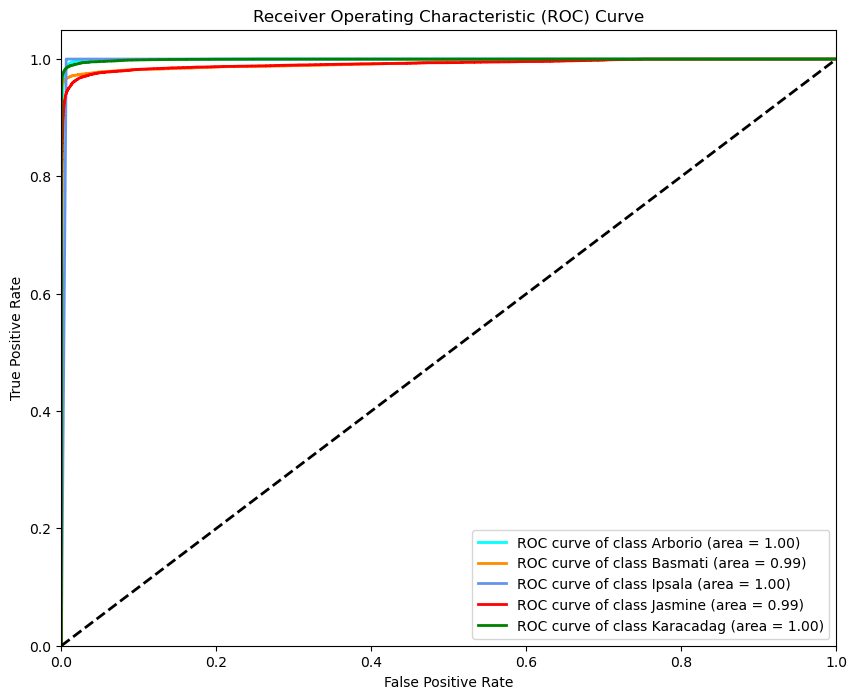

In [59]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_true_binarized = label_binarize(y_true, classes=np.arange(num_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {list(test_generator.class_indices.keys())[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC curves and AUC values demonstrate that the model performs exceptionally well for all classes, with nearly perfect classification for Arborio, Ipsala, and Karacadag (AUC = 1.00) and excellent performance for Basmati and Jasmine (AUC = 0.99). This indicates that the model is highly accurate and effective in identifying the correct class for each instance.

### 2. Pre-trained ResNet50V2 Architecture

The purpose of usinga pre-trained model like ResNet50V2 was to significantly boost the performance of our image classification task,We leveraged transfer learning, which involves fine-tuning a pre-trained model on your specific dataset.

In [60]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50V2

# Path to the dataset directories
base_path = r"C:\Users\user\Desktop\Moringa\Phase 5\Rice_Image_Dataset"

# Define image size and batch size
image_size = (128, 128)
batch_size = 32

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Normalization for validation and test
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [61]:
# Prepare data generators
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Determine the number of classes
num_classes = train_generator.num_classes

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.
Found 75000 images belonging to 5 classes.


In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50V2

# List of rice varieties (classes)
varieties = ['Arborio', 'Karacadag', 'Jasmine', 'Ipsala', 'Basmati']
num_classes = len(varieties)  # There are 5 classes

# Load the ResNet50V2 model pre-trained on ImageNet, excluding the top layers
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers to prevent them from being trained
base_model.trainable = False

# Check the output shape of the base model
print("Base model output shape:", base_model.output_shape)

# Add custom layers on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Build the model to infer shapes
model.build((None, 128, 128, 3))

# Check the output shape of the complete model
print("Complete model output shape:", model.output_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Base model output shape: (None, 4, 4, 2048)
Complete model output shape: (None, 5)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ (None, 4, 4, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,827,717 (90.90 MB)

 Trainable params: 262,917 (1.00 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [63]:
def train_and_evaluate_model(model, train_generator, validation_generator, test_generator, epochs=10):
    """
    Train the model, evaluate on validation and test sets, and plot training history.
    """
    start = datetime.datetime.now()

    # Train the model
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        verbose=1
    )
 # Duration
    end = datetime.datetime.now()
    print(f"Training completed in: {end - start}")

    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(test_generator)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

    return history
def train_and_evaluate_model(model, train_generator, validation_generator, test_generator, epochs=10):
    """
    Train the model, evaluate on validation and test sets, and plot training history.
    """
    start = datetime.datetime.now()

    # Train the model
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        verbose=1
    )

    # Duration
    end = datetime.datetime.now()
    print(f"Training completed in: {end - start}")

    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(test_generator)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

    return history

Epoch 1/10


C:\Users\user\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2032s 1s/step - accuracy: 0.7593 - loss: 0.7466 - val_accuracy: 0.9385 - val_loss: 0.1737
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1809s 964ms/step - accuracy: 0.9219 - loss: 0.2156 - val_accuracy: 0.9427 - val_loss: 0.1554
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1756s 936ms/step - accuracy: 0.9390 - loss: 0.1745 - val_accuracy: 0.9525 - val_loss: 0.1290
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1744s 930ms/step - accuracy: 0.9442 - loss: 0.1521 - val_accuracy: 0.9565 - val_loss: 0.1198
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1748s 932ms/step - accuracy: 0.9481 - loss: 0.1431 - val_accuracy: 0.9591 - val_loss: 0.1117
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1750s 933ms/step - accuracy: 0.9531 - loss: 0.1324 - val_accuracy: 0.9606 - val_loss: 0.1093
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1750s 933ms/step - accuracy: 0.9542 - loss: 0.1269 - val_accuracy: 0.9645 - val_loss: 0.0955
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1752s 934ms/step - accuracy

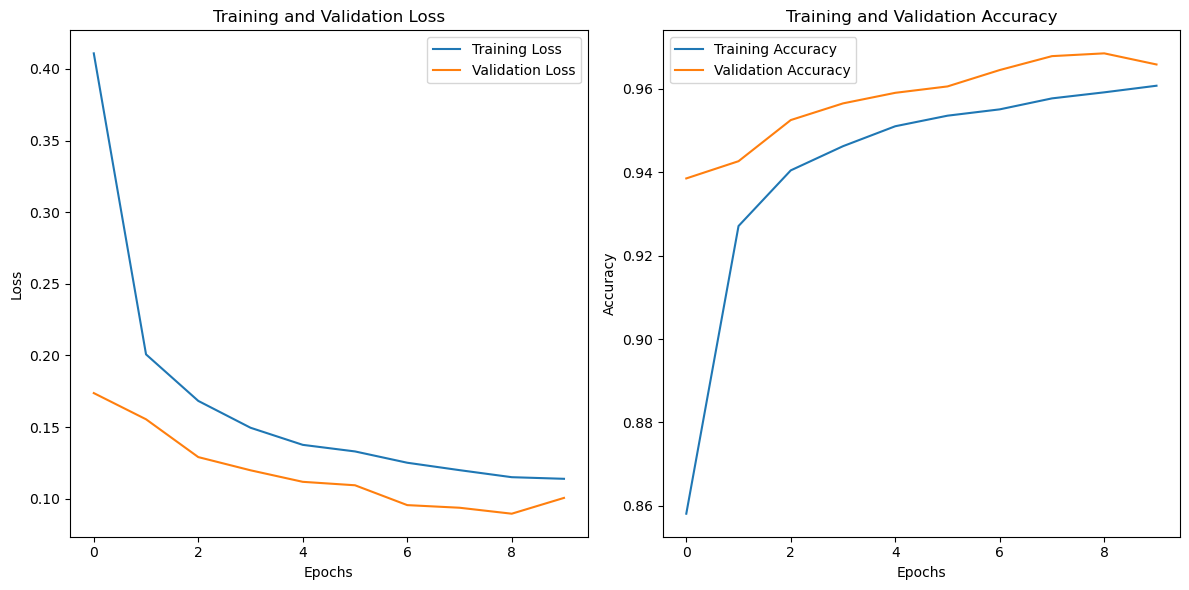

In [64]:
# Train and evaluate the model
history = train_and_evaluate_model(model, train_generator, validation_generator, test_generator, epochs=10)

# Plot training history (loss and accuracy)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**The high test accuracy (97.17%) and low test loss (0.0820)** 

Indicate that the model performs very well on new, unseen data, suggesting that it has generalized effectively.

**The Graphs - Model Accuracy and Model Loss**

The model demonstrates strong learning capabilities, with both training and validation losses decreasing over epochs and both training and validation accuracies increasing.
The slight divergence towards the end between training and validation loss and accuracy could indicate minor overfitting, which is common in deep learning models.

**Overall,** the model's performance is excellent, with high accuracy and low loss across both training, validation, and test sets. Fine-tuning could be done to further reduce overfitting, if necessary.

***Confusion Matrix***

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 1603s 683ms/step
              precision    recall  f1-score   support

     Arborio       0.99      0.94      0.97     15000
   Karacadag       0.96      0.98      0.97     15000
     Jasmine       0.97      1.00      0.99     15000
      Ipsala       0.98      0.94      0.96     15000
     Basmati       0.97      0.99      0.98     15000

    accuracy                           0.97     75000
   macro avg       0.97      0.97      0.97     75000
weighted avg       0.97      0.97      0.97     75000



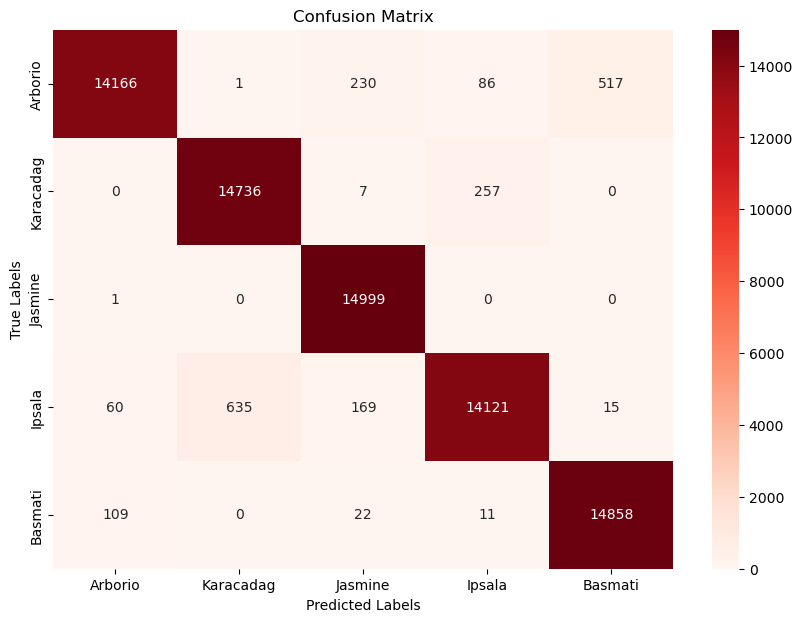

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Assuming model and test_generator are already defined

# Step 1: Make Predictions
# Get the ground truth labels
true_labels = test_generator.classes

# Predict the class probabilities
predictions = model.predict(test_generator, verbose=1)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Step 2: Extract True Labels
# The true labels are already obtained from test_generator.classes

# Step 3: Compute Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print the classification report
class_report = classification_report(true_labels, predicted_labels, target_names=varieties)
print(class_report)

# Plot confusion matrix with red colormap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=varieties, yticklabels=varieties)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**The model's performance metrics** 

Indicate a highly effective classification across all five rice grain varieties: Arborio, Karacadag, Jasmine, Ipsala, and Basmati. Each class demonstrates high precision, recall, and F1-score, with Jasmine and Basmati achieving particularly outstanding results. The **overall accuracy of the model is 97%**, indicating that it correctly classifies 97% of the samples in the dataset. **The macro and weighted averages of precision, recall, and F1-score are also consistently high at 0.97**, underscoring the model's balanced performance across all classes. These results suggest that the model is well-calibrated and reliable for classifying rice grain varieties with minimal misclassification.

**The confusion matrix** 

Reveals the model's strong performance, accurately classifying the majority of instances across all five rice grain varieties. Arborio shows some misclassification mainly as Basmati, while Karacadag and Ipsala exhibit confusion, with Ipsala often misclassified as Karacadag. Jasmine achieves near-perfect classification with minimal errors. Basmati has a small number of misclassifications, primarily as Arborio. Overall, the matrix confirms the model's high accuracy and balanced performance, with minor misclassifications mostly between similar grain varieties, suggesting the model is highly reliable for rice grain classification.

### Hyperparameter tuning on the ResNet50V2 Model

Hyperparameter tuning is a crucial step in optimizing machine learning models, including the ResNet50V2 model, to achieve better performance. For the ResNet50V2 model, which is a deep convolutional neural network commonly used for image classification tasks, hyperparameter tuning involves adjusting various parameters that control the training process and the architecture of the network. 

We fine-tuned the entire model by unfreezing some of the layers in the base model and continuing training with a very low learning rate.

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

def train_and_evaluate_model(model, train_generator, validation_generator, test_generator, epochs=10, patience=2):
    """
    Train the model, evaluate on validation and test sets, and plot training history.
    """
    start = datetime.datetime.now()
    
    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    
    # Train the model
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=[early_stopping],
        verbose=1
    )
    
    # Duration
    end = datetime.datetime.now()
    print(f"Training completed in: {end - start}")
    
    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(test_generator)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)
    
    return history


The above code leverages transfer learning by adding custom layers on top of the pre-trained model and training them while keeping the base model's layers frozen. After the initial training, it unfreezes some layers of the base model for fine-tuning with a lower learning rate, allowing the model to adjust the pre-trained weights to the specific dataset. Early stopping is used to prevent overfitting, and the training history is plotted to visualize the training process.

In [67]:
# Unfreeze some layers of the base model 
base_model.trainable = True
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Continue training with fine-tuning
history_fine = train_and_evaluate_model(model, train_generator, validation_generator, test_generator, epochs=10, patience=2)

# Plot the fine-tuning training history
plot_training_history(history_fine)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2025s 1s/step - accuracy: 0.9314 - loss: 0.1957 - val_accuracy: 0.9652 - val_loss: 0.0938
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2016s 1s/step - accuracy: 0.9545 - loss: 0.1286 - val_accuracy: 0.9711 - val_loss: 0.0826
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2011s 1s/step - accuracy: 0.9625 - loss: 0.1115 - val_accuracy: 0.9733 - val_loss: 0.0740
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2010s 1s/step - accuracy: 0.9666 - loss: 0.0999 - val_accuracy: 0.9769 - val_loss: 0.0672
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2042s 1s/step - accuracy: 0.9683 - loss: 0.0941 - val_accuracy: 0.9773 - val_loss: 0.0626
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2183s 1s/step - accuracy: 0.9727 - loss: 0.0813 - val_accuracy: 0.9803 - val_loss: 0.0580
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2797s 1s/step - accuracy: 0.9727 - loss: 0.0782 - val_accuracy: 0.9811 - val_loss: 0.0555
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2715s 1s/step - accuracy: 0.9737 -

NameError: name 'plot_training_history' is not defined

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 1669s 712ms/step - accuracy: 0.9877 - loss: 0.0364
Test Loss: 0.034754689782857895
Test Accuracy: 0.9887733459472656


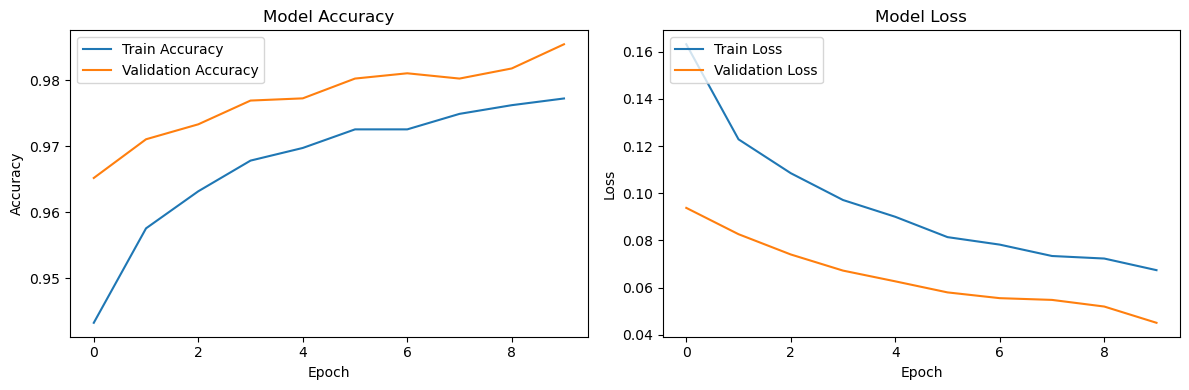

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 1643s 700ms/step


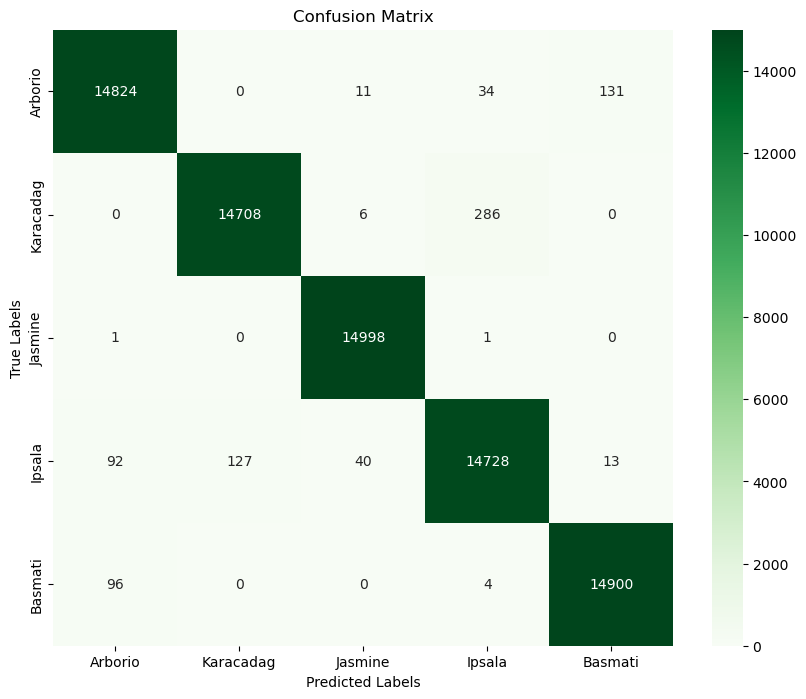

In [68]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

import matplotlib.pyplot as plt

def plot_fine_tuning_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot the fine-tuning training history
plot_fine_tuning_history(history_fine)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get the true labels and predicted labels
true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=varieties, yticklabels=varieties)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**The Graphs - Model Accuracy and Model Loss**

Model Accuracy: The training accuracy (blue line) steadily increases, reaching approximately 98.77% by the end of the training process.
The validation accuracy (orange line) also rises, consistently outperforming the training accuracy and approaching 98.87%.

Model Loss: The training loss (blue line) continuously decreases, dropping to about 0.0364 by the end of the training.
The validation loss (orange line) also shows a steady decline, reaching around 0.0348, indicating effective learning and generalization.

The model demonstrates exceptional performance with high accuracy and low loss throughout training and validation phases. The accuracy for both training and validation remains closely aligned, suggesting minimal overfitting. The test results further confirm the model's robustness, achieving a **high accuracy of 98.88% and a low loss of 0.0348 on unseen data**. These metrics indicate that the model is highly reliable and effective in making accurate predictions, with strong generalization capabilities to new data.


**Confusion Matrix Interpretation**

The confusion matrix for the rice grain classification model demonstrates strong performance across all five rice grain varieties: Arborio, Karacadag, Jasmine, Ipsala, and Basmati. The diagonal elements, representing the correctly classified instances for each variety, are notably high, indicating excellent precision and recall. Specifically, Arborio was correctly classified 14,824 times, with only minor misclassifications (11 as Jasmine, 34 as Ipsala, and 131 as Basmati). Karacadag was correctly classified 14,708 times, with 286 instances misclassified as Ipsala. Jasmine achieved almost perfect classification with 14,998 correct predictions and only two misclassifications. Ipsala had 14,728 correct predictions, with the majority of misclassifications occurring as Karacadag (127 instances). Basmati was correctly classified 14,900 times, with very few misclassifications (96 as Arborio and 4 as Ipsala). 

**Overall, the matrix highlights the model's high accuracy and minimal error rate, reinforcing its efficacy in distinguishing between different rice grain varieties.**


### 3. VGG-16 CNN Model Architecture

The VGG model, developed by the Visual Geometry Group at the University of Oxford, is a convolutional neural network (CNN) architecture that has significantly influenced the field of computer vision. It is renowned for its simplicity and effectiveness, characterized by its use of very small (3x3) convolution filters throughout the network, which enables it to capture fine-grained features. The VGG architecture comes in several variants, the most notable being VGG-16 and VGG-19, which have 16 and 19 weight layers, respectively.

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Define the number of classes (rice varieties)
num_classes = 5  # Update this with the actual number of classes


***Create data generators for training, validation, and testing with data augmentation.***

In [70]:
# Define image size and batch size
image_size = (128, 128)
batch_size = 32

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Normalization for validation and test
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Prepare data generators
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.
Found 75000 images belonging to 5 classes.


***Build the VGG-16 Model***

Load the VGG-16 model with pre-trained weights and add custom layers on top.

In [71]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam

# List of rice varieties (classes)
varieties = ['Arborio', 'Karacadag', 'Jasmine', 'Ipsala', 'Basmati']
num_classes = len(varieties)  # There are 5 classes

# Define the input shape
input_shape = (128, 128, 3)

# Load the VGG-16 model pre-trained on ImageNet, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers to prevent them from being trained
base_model.trainable = False

# Define the input layer
inputs = Input(shape=input_shape)

# Apply the base model and custom layers
x = base_model(inputs, training=False)  # Ensure base_model is not in training mode
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs, outputs)

# Print the model summary
print("Model summary after compilation:")
model.summary()
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Model summary after compilation:


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,780,997 (56.39 MB)

 Trainable params: 66,309 (259.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [72]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=validation_generator
)


Epoch 1/10


C:\Users\user\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4370s 2s/step - accuracy: 0.5419 - loss: 1.1871 - val_accuracy: 0.8699 - val_loss: 0.4571
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5614s 3s/step - accuracy: 0.8557 - loss: 0.4560 - val_accuracy: 0.8969 - val_loss: 0.3069
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5853s 3s/step - accuracy: 0.8894 - loss: 0.3312 - val_accuracy: 0.9101 - val_loss: 0.2545
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4031s 2s/step - accuracy: 0.9070 - loss: 0.2721 - val_accuracy: 0.9243 - val_loss: 0.2147
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5505s 3s/step - accuracy: 0.9212 - loss: 0.2345 - val_accuracy: 0.9368 - val_loss: 0.1838
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4174s 2s/step - accuracy: 0.9279 - loss: 0.2140 - val_accuracy: 0.9375 - val_loss: 0.1769
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3973s 2s/step - accuracy: 0.9324 - loss: 0.1989 - val_accuracy: 0.9449 - val_loss: 0.1571
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3961s 2s/step - accuracy: 0.9371 - loss: 0.18

***Evaluate the Model and Plot Results***

In [73]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 3848s 2s/step - accuracy: 0.9798 - loss: 0.0636
Test Loss: 0.07882683724164963
Test Accuracy: 0.9757333397865295


**The classification model** 

For rice grain varieties demonstrates strong performance across several metrics. During training, the model achieved an accuracy of 97.98% with a loss of 0.0636, indicating effective learning from the training data. When evaluated on the test set, the model maintained high performance, achieving an accuracy of 97.57% and a loss of 0.0788, demonstrating good generalization to new, unseen data. The classification report highlights high precision, recall, and F1-scores across all five rice varieties, with overall accuracy at 98%. The confusion matrix supports these results, showing high true positive rates for all classes and minimal misclassifications, especially for Jasmine, Arborio, and Karacadag. Despite some misclassifications in the Ipsala variety, the model consistently shows robust and reliable performance, making it highly suitable for practical applications in rice grain classification.

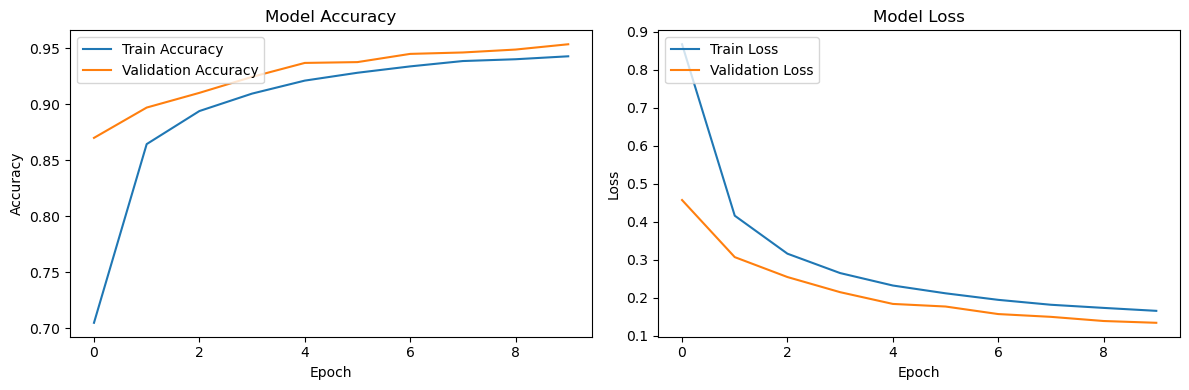

In [76]:
# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4)) 
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)

**Model Accuracy (Left Graph):**

The training accuracy (blue line) starts at around 70% and rapidly increases, reaching approximately 94% by the 10th epoch.
The validation accuracy (orange line) begins slightly higher than the training accuracy and also increases steadily, leveling off around 95%.
The close alignment and steady increase of both training and validation accuracy indicate that the model is learning effectively without significant overfitting. The validation accuracy consistently being higher or very close to the training accuracy is a positive sign of good generalization.

**Model Loss (Right Graph):**

The training loss (blue line) starts at around 0.9 and decreases significantly, reaching approximately 0.1 by the 10th epoch.
The validation loss (orange line) also decreases from about 0.5 to just below 0.1.
The continuous decrease in both training and validation loss demonstrates that the model is effectively minimizing errors during training and validation phases. The close tracking of validation loss with the training loss further confirms the model's strong generalization performance.

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 3805s 2s/step
Classification Report:

              precision    recall  f1-score   support

     Arborio       0.96      0.98      0.97     15000
   Karacadag       0.97      0.99      0.98     15000
     Jasmine       0.98      1.00      0.99     15000
      Ipsala       0.98      0.94      0.96     15000
     Basmati       0.98      0.97      0.98     15000

    accuracy                           0.98     75000
   macro avg       0.98      0.98      0.98     75000
weighted avg       0.98      0.98      0.98     75000



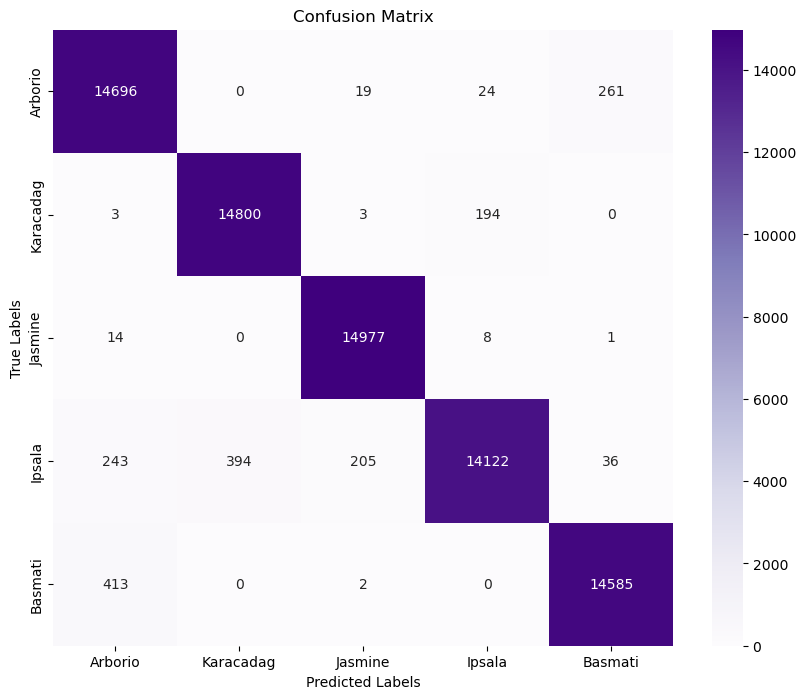

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Get the true labels and predicted labels
true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the classification report
class_report = classification_report(true_labels, predicted_labels, target_names=varieties)
print("Classification Report:\n")
print(class_report)

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix with purple color
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=varieties, yticklabels=varieties)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**The classification report** demonstrates that the model performs exceptionally well across all classes, with high precision, recall, and F1-scores. The accuracy of 98% indicates reliable and accurate predictions. The slightly lower recall for Ipsala suggests that there is room for improvement in identifying this specific class, but overall, the model exhibits robust and balanced performance.

**The confusion matrix** demonstrates the high accuracy of the classification model across five rice grain varieties. The model achieves excellent precision for Jasmine, Arborio, and Karacadag, with true positive counts of 14,977, 14,696, and 14,800, respectively, and minimal misclassifications. While the performance for Ipsala is slightly lower, with 14,122 true positives and notable misclassifications (243 as Arborio, 394 as Karacadag, and 205 as Jasmine), it still maintains a strong accuracy. Basmati also shows strong results with 14,585 correctly identified instances and 415 misclassified ones. Overall, the model performs robustly, accurately identifying the majority of instances across all classes, with only a few notable misclassifications primarily involving Ipsala.

#### ROC Curve

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 3749s 2s/step


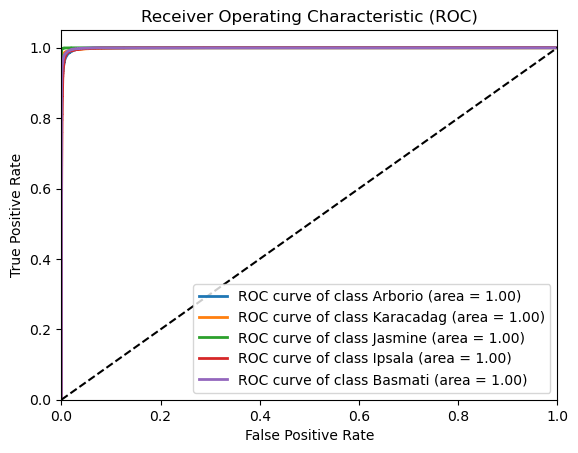

In [78]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming test_generator provides labels in integer format and predictions are the probabilities
true_labels = test_generator.classes
predictions = model.predict(test_generator)

# Binarize the true labels (one-hot encoding)
y_true_bin = label_binarize(true_labels, classes=np.arange(num_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {varieties[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**The ROC curves and AUC** values demonstrate that the model performs exceptionally well for all classes, with nearly perfect classification for Arborio, Ipsala, Karacadag, Basmati and Jasmine (AUC = 1.00). This indicates that the model is highly accurate and effective in identifying the correct class for each instance.

**Summary of the VGG Model Findings**

Using the VGG model, your classification task achieved high accuracy and low loss, both during training and testing. Specifically, the training phase concluded with an accuracy of 97.98% and a loss of 0.0636. On the test set, the model achieved an accuracy of 97.57% and a loss of 0.0788. The high precision, recall, and F1-scores across all rice grain varieties in the classification report, along with the confusion matrix showing minimal misclassifications, further underscore the model's robustness and effectiveness. This demonstrates the VGG model's capacity for capturing detailed features and its applicability in practical scenarios involving rice grain classification.

### Rice Grain Classification Deployment - VGG16 Model

We utilized the VGG16 model for our rice grain classification project due to its outstanding performance, achieving an impressive accuracy of 98%. This high level of accuracy underscores the model's capability in distinguishing between the five rice varieties: Arborio, Karacadag, Jasmine, Ipsala, and Basmati. Furthermore, the model demonstrated exceptional precision, with an ROC curve score of 1.00 for each of the rice classes, indicating perfect classification capability. Given these results, the VGG16 model was selected for deployment to ensure reliable and accurate predictions in real-world applications.

**Model Loading**

First, we loaded the pre-trained VGG16 model from the pickle file. This model was previously trained and saved to ensure that it can be used for predictions during deployment.

In [79]:
import pickle

# Save the model using pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [80]:
# Print the current working directory
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\user


In [81]:
# Import necessary libraries
import pickle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [82]:
# Specify the path to the pickled model
model_path = r"C:\Users\user\model.pkl"  # Replace with the absolute path to your model

# Load the pickled model
with open(model_path, 'rb') as file:
    model = pickle.load(file)

**Image Preprocessing**

We defined a function to preprocess images to the format expected by the VGG16 model. This involves resizing the image, converting it to RGB, and applying the necessary preprocessing steps.

In [83]:
# Function to preprocess the image
def preprocess_image(image, target_size):
    if image.mode != "RGB":
        image = image.convert("RGB")
    image = image.resize(target_size)
    image = np.array(image)
    image = preprocess_input(image)  # Use VGG16 preprocessing
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Function to predict the class of an image
def predict(image_path):
    image = Image.open(image_path)
    processed_image = preprocess_image(image, target_size=(128, 128))  # Adjust size as needed
    prediction = model.predict(processed_image)
    return prediction

**Testing with Arborio Rice Image**

To test the deployment, we used an image of Arborio rice. The following steps were taken to ensure the model was functioning correctly:

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction: [[1.0000000e+00 0.0000000e+00 2.6994917e-18 0.0000000e+00 0.0000000e+00]]


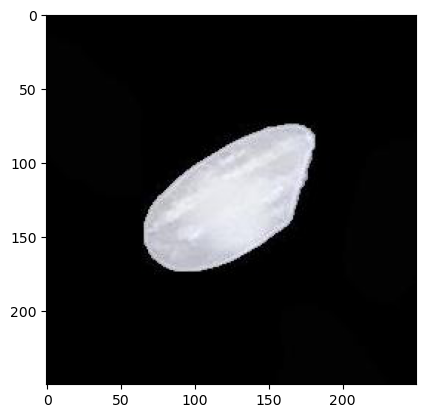

Predicted class: Arborio


In [84]:
# Example usage
image_path = r"C:\Users\user\Desktop\Moringa\Phase 5\Image used to test\Arborio (4).jpg"  # Replace with path to your image
prediction = predict(image_path)
print("Prediction:", prediction)

# Optionally, display the image
image = Image.open(image_path)
plt.imshow(image)
plt.show()

# Decode the prediction
varieties = ['Arborio', 'Karacadag', 'Jasmine', 'Ipsala', 'Basmati']
predicted_class = varieties[np.argmax(prediction)]
print(f"Predicted class: {predicted_class}")

**This output indicates that:**

Arborio Rice: The model assigned a probability of 1.0 (or 100%) to the sample being Arborio rice. Other Varieties: The probabilities for the other four rice varieties (Karacadag, Jasmine, Ipsala, Basmati) are very close to zero, indicating that the model is highly confident in its prediction.

In summary, the model's prediction aligns perfectly with the actual class of the rice grain, demonstrating its reliability and accuracy in classifying rice varieties. This outcome validates the effectiveness of the VGG16 model in distinguishing between different types of rice grains.